# Capstone Analysis and Executive Summary

## Executive Summary

## Determining the Top Teams in America

College football has become a multi-billion dollar enterprise. Division 1-A (FBS) football prints enough money to make a mint, and the largest sporting crowds in America can be found on college campuses across the nation. The top division of football recently underwent a transformation, moving to a four-team playoff model that has already created more than its fair share of controversy. Indeed, it is irksome to many that the four teams playing are chosen by a potentially biased committee, with supposedly shifting criteria year to year.

Outcry for overhauls of the ranking system have loudened in the past two years, particularly 2017, when a team that won neither its division nor its conference was selected as a playoff team over another university's squad that did win both titles. That is the driving force behind this study to determine the most vital characteristics - from a numbers standpoint - of a college football team's success.

Using game result and team statistical information from the past five years, the answer is clear. Carefully examining a team's rushing, pass completion, and key-down conversion percentages will go the longest way toward determining the best teams in the country (when combined with wins, of course). Stats such as average yards per rush, third down conversion percentage, and the prevention of an opponent from converting on third down, all are top components of high-caliber teams.

The above insights were achieved through statistical analysis techniques, particularly principal component analysis. This method determines how much variance within a data set can be explained by single variables, and identifies the top several candidates that can reliably reproduce a close estimate of the data set if called upon. Raw statistical data, as well as engineered features, were fed into the analysis chain to determine those winning traits.

Combined with elementary analysis techniques and predictive modeling approaches, it is considered highly lucrative to consider the construction, testing, and deployment of a ranking system that combines the top success indicators with other relevant data to identify the best NCAA football teams in the country, and lobby for this system's adoption in playoff consideration.

### Library, Module, and Data Imports

In [130]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [131]:
data2017 = pd.read_pickle('teamdata17.pickle')
data2016 = pd.read_pickle('teamdata16.pickle')
data2015 = pd.read_pickle('teamdata15.pickle')
data2014 = pd.read_pickle('teamdata14.pickle')
data2013 = pd.read_pickle('teamdata13.pickle')

In [134]:
data2013.head()

,teamID,team,season,week,gameType,gameLoc,confGame,oppName,teamScore,oppScore,...,OP_FD,OP_3A,OP_3C,OP_4A,OP_4C,OP_PEN,OP_TO,OP_FL,OP_INT,OP_POSS
0,2028,AR-Monticello,2013,[0],[0],[0],[0],[0],[0],[0],...,0,0,0,0,0,0,0,0,0,0
1,2029,AR-Pine Bluff,2013,[1],[regular],[False],[False],[Arkansas State],[11],[62],...,[25.0],[12.0],[9.0],[2.0],[0.0],[15.0],[2.0],[2.0],[0.0],[33:25]
2,2000,Abil Christian,2013,[9],[regular],[False],[False],[New Mexico St],[29],[34],...,[26.0],[13.0],[7.0],[0.0],[0.0],[79.0],[3.0],[1.0],[2.0],[30:46]
3,2001,Adams St,2013,[0],[0],[0],[0],[0],[0],[0],...,0,0,0,0,0,0,0,0,0,0
4,2003,Adrian,2013,[0],[0],[0],[0],[0],[0],[0],...,0,0,0,0,0,0,0,0,0,0


In [135]:
data2016.head()

,teamID,team,season,week,gameType,gameLoc,confGame,oppName,teamScore,oppScore,...,OP_FD,OP_3A,OP_3C,OP_4A,OP_4C,OP_PEN,OP_TO,OP_FL,OP_INT,OP_POSS
0,2028,AR-Monticello,2016,[0],[0],[0],[0],[0],[0],[0],...,0,0,0,0,0,0,0,0,0,0
1,2029,AR-Pine Bluff,2016,[0],[0],[0],[0],[0],[0],[0],...,0,0,0,0,0,0,0,0,0,0
2,2000,Abil Christian,2016,[1],[regular],[False],[False],[Air Force],[21],[37],...,[29.0],[13.0],[6.0],[0.0],[0.0],[72.0],[2.0],[2.0],[0.0],[34:28]
3,2001,Adams St,2016,[0],[0],[0],[0],[0],[0],[0],...,0,0,0,0,0,0,0,0,0,0
4,2003,Adrian,2016,[0],[0],[0],[0],[0],[0],[0],...,0,0,0,0,0,0,0,0,0,0


# Part 1: Combine 2013-2016, Delete Useless Rows

In [136]:
testdata = pd.concat([data2013,data2014,data2015,data2016], ignore_index=True)

In [137]:
testdata.drop(testdata[testdata.TM_POSS == 0].index, inplace=True)
testdata.drop('index', axis=1, inplace=True)
testdata.reset_index(inplace=True)

In [140]:
testdata.head()

,teamID,team,season,week,gameType,gameLoc,confGame,oppName,teamScore,oppScore,...,OP_FD,OP_3A,OP_3C,OP_4A,OP_4C,OP_PEN,OP_TO,OP_FL,OP_INT,OP_POSS
0,2029,AR-Pine Bluff,2013,[1],[regular],[False],[False],[Arkansas State],[11],[62],...,[25.0],[12.0],[9.0],[2.0],[0.0],[15.0],[2.0],[2.0],[0.0],[33:25]
1,2000,Abil Christian,2013,[9],[regular],[False],[False],[New Mexico St],[29],[34],...,[26.0],[13.0],[7.0],[0.0],[0.0],[79.0],[3.0],[1.0],[2.0],[30:46]
2,2005,Air Force,2013,"[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 13, 14]","[regular, regular, regular, regular, regular, ...","[False, False, False, False, False, False, Fal...","[False, True, True, True, True, False, True, F...","[Colgate, Utah State, Boise State, Wyoming, Ne...","[38, 20, 20, 23, 42, 10, 20, 10, 42, 37, 21, 13]","[13, 52, 42, 56, 45, 28, 27, 45, 28, 45, 41, 58]",...,"[19.0, 32.0, 31.0, 34.0, 35.0, 18.0, 22.0, 22....","[15.0, 15.0, 10.0, 14.0, 18.0, 14.0, 16.0, 11....","[7.0, 11.0, 8.0, 10.0, 12.0, 8.0, 9.0, 5.0, 5....","[2.0, 1.0, 0.0, 1.0, 3.0, 0.0, 3.0, 1.0, 3.0, ...","[1.0, 1.0, 0.0, 1.0, 2.0, 0.0, 0.0, 1.0, 1.0, ...","[15.0, 70.0, 55.0, 91.0, 40.0, 5.0, 40.0, 5.0,...","[0.0, 2.0, 2.0, 1.0, 1.0, 0.0, 2.0, 0.0, 0.0, ...","[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...","[32:57, 32:03, 30:16, 28:26, 31:43, 28:55, 33:..."
3,2006,Akron,2013,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14]","[regular, regular, regular, regular, regular, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, True, True, True,...","[UCF, JMU, Michigan, Louisiana, Bowling Green,...","[7, 35, 24, 30, 14, 3, 20, 24, 24, 16, 14, 31]","[38, 33, 28, 35, 31, 43, 27, 17, 42, 7, 13, 29]",...,"[23.0, 26.0, 19.0, 26.0, 22.0, 22.0, 18.0, 18....","[14.0, 20.0, 10.0, 15.0, 14.0, 14.0, 15.0, 16....","[9.0, 9.0, 3.0, 6.0, 9.0, 7.0, 1.0, 8.0, 4.0, ...","[0.0, 3.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, ...","[0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...","[10.0, 72.0, 45.0, 30.0, 58.0, 35.0, 31.0, 60....","[0.0, 2.0, 4.0, 1.0, 0.0, 1.0, 0.0, 2.0, 1.0, ...","[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...","[0.0, 1.0, 3.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...","[32:32, 38:20, 26:44, 33:06, 36:03, 28:46, 27:..."
4,333,Alabama,2013,"[1, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 1]","[regular, regular, regular, regular, regular, ...","[True, False, False, False, False, False, Fals...","[False, True, False, True, False, True, True, ...","[VT, Texas A&M, Colorado State, Ole Miss, Geor...","[35, 49, 31, 25, 45, 48, 52, 45, 38, 20, 49, 2...","[10, 42, 6, 0, 3, 7, 0, 10, 17, 7, 0, 34, 45]",...,"[7.0, 31.0, 13.0, 11.0, 9.0, 13.0, 16.0, 14.0,...","[17.0, 8.0, 15.0, 14.0, 12.0, 12.0, 15.0, 12.0...","[3.0, 5.0, 4.0, 4.0, 4.0, 2.0, 6.0, 3.0, 7.0, ...","[0.0, 0.0, 1.0, 4.0, 0.0, 2.0, 2.0, 2.0, 2.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, ...","[35.0, 55.0, 35.0, 29.0, 60.0, 50.0, 20.0, 32....","[1.0, 2.0, 1.0, 2.0, 1.0, 0.0, 3.0, 2.0, 2.0, ...","[0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 2.0, ...","[1.0, 2.0, 0.0, 1.0, 0.0, 0.0, 2.0, 2.0, 0.0, ...","[28:48, 24:58, 31:10, 21:31, 26:30, 24:01, 31:..."


In [141]:
# want to make sure every column included in analysis has at least nine games per team-season
train_data = testdata[testdata.week.map(len) >= 9].copy()

In [142]:
train_data.head()

,teamID,team,season,week,gameType,gameLoc,confGame,oppName,teamScore,oppScore,...,OP_FD,OP_3A,OP_3C,OP_4A,OP_4C,OP_PEN,OP_TO,OP_FL,OP_INT,OP_POSS
2,2005,Air Force,2013,"[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 13, 14]","[regular, regular, regular, regular, regular, ...","[False, False, False, False, False, False, Fal...","[False, True, True, True, True, False, True, F...","[Colgate, Utah State, Boise State, Wyoming, Ne...","[38, 20, 20, 23, 42, 10, 20, 10, 42, 37, 21, 13]","[13, 52, 42, 56, 45, 28, 27, 45, 28, 45, 41, 58]",...,"[19.0, 32.0, 31.0, 34.0, 35.0, 18.0, 22.0, 22....","[15.0, 15.0, 10.0, 14.0, 18.0, 14.0, 16.0, 11....","[7.0, 11.0, 8.0, 10.0, 12.0, 8.0, 9.0, 5.0, 5....","[2.0, 1.0, 0.0, 1.0, 3.0, 0.0, 3.0, 1.0, 3.0, ...","[1.0, 1.0, 0.0, 1.0, 2.0, 0.0, 0.0, 1.0, 1.0, ...","[15.0, 70.0, 55.0, 91.0, 40.0, 5.0, 40.0, 5.0,...","[0.0, 2.0, 2.0, 1.0, 1.0, 0.0, 2.0, 0.0, 0.0, ...","[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...","[32:57, 32:03, 30:16, 28:26, 31:43, 28:55, 33:..."
3,2006,Akron,2013,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14]","[regular, regular, regular, regular, regular, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, True, True, True,...","[UCF, JMU, Michigan, Louisiana, Bowling Green,...","[7, 35, 24, 30, 14, 3, 20, 24, 24, 16, 14, 31]","[38, 33, 28, 35, 31, 43, 27, 17, 42, 7, 13, 29]",...,"[23.0, 26.0, 19.0, 26.0, 22.0, 22.0, 18.0, 18....","[14.0, 20.0, 10.0, 15.0, 14.0, 14.0, 15.0, 16....","[9.0, 9.0, 3.0, 6.0, 9.0, 7.0, 1.0, 8.0, 4.0, ...","[0.0, 3.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, ...","[0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...","[10.0, 72.0, 45.0, 30.0, 58.0, 35.0, 31.0, 60....","[0.0, 2.0, 4.0, 1.0, 0.0, 1.0, 0.0, 2.0, 1.0, ...","[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...","[0.0, 1.0, 3.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...","[32:32, 38:20, 26:44, 33:06, 36:03, 28:46, 27:..."
4,333,Alabama,2013,"[1, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 1]","[regular, regular, regular, regular, regular, ...","[True, False, False, False, False, False, Fals...","[False, True, False, True, False, True, True, ...","[VT, Texas A&M, Colorado State, Ole Miss, Geor...","[35, 49, 31, 25, 45, 48, 52, 45, 38, 20, 49, 2...","[10, 42, 6, 0, 3, 7, 0, 10, 17, 7, 0, 34, 45]",...,"[7.0, 31.0, 13.0, 11.0, 9.0, 13.0, 16.0, 14.0,...","[17.0, 8.0, 15.0, 14.0, 12.0, 12.0, 15.0, 12.0...","[3.0, 5.0, 4.0, 4.0, 4.0, 2.0, 6.0, 3.0, 7.0, ...","[0.0, 0.0, 1.0, 4.0, 0.0, 2.0, 2.0, 2.0, 2.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, ...","[35.0, 55.0, 35.0, 29.0, 60.0, 50.0, 20.0, 32....","[1.0, 2.0, 1.0, 2.0, 1.0, 0.0, 3.0, 2.0, 2.0, ...","[0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 2.0, ...","[1.0, 2.0, 0.0, 1.0, 0.0, 0.0, 2.0, 2.0, 0.0, ...","[28:48, 24:58, 31:10, 21:31, 26:30, 24:01, 31:..."
10,12,Arizona,2013,"[1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 1]","[regular, regular, regular, regular, regular, ...","[False, False, False, False, False, False, Fal...","[False, False, False, True, True, True, True, ...","[N Arizona, UNLV, UTSA, Washington, USC, Utah,...","[35, 58, 38, 13, 31, 35, 44, 33, 26, 17, 42, 2...","[0, 13, 13, 31, 38, 24, 20, 28, 31, 24, 16, 58...",...,"[15.0, 10.0, 23.0, 24.0, 27.0, 16.0, 19.0, 24....","[19.0, 15.0, 16.0, 17.0, 13.0, 18.0, 17.0, 16....","[4.0, 4.0, 8.0, 9.0, 6.0, 5.0, 7.0, 4.0, 9.0, ...","[5.0, 3.0, 1.0, 2.0, 0.0, 2.0, 2.0, 3.0, 1.0, ...","[4.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, ...","[60.0, 70.0, 63.0, 75.0, 50.0, 60.0, 20.0, 82....","[3.0, 3.0, 2.0, 1.0, 0.0, 2.0, 1.0, 2.0, 1.0, ...","[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[3.0, 2.0, 1.0, 1.0, 0.0, 2.0, 1.0, 2.0, 0.0, ...","[40:16, 23:27, 33:03, 29:55, 33:20, 30:43, 30:..."
11,9,Arizona State,2013,"[2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 1]","[regular, regular, regular, regular, regular, ...","[False, False, False, False, True, False, Fals...","[False, False, True, True, False, True, True, ...","[Sacramento St, Wisconsin, Stanfo

In [143]:
data2017.drop(data2017[data2017.TM_POSS == 0].index, inplace=True)
data2017.reset_index(drop=True, inplace=True)

In [144]:
test_data = data2017[data2017.week.map(len) >= 9].copy()

**Training and testing data sets are now ready.**

# Part 2: Column Calculations

In [145]:
train_data.columns

Index(['teamID', 'team', 'season', 'week', 'gameType', 'gameLoc', 'confGame',
       'oppName', 'teamScore', 'oppScore', 'result', 'TM_YD', 'TM_RA', 'TM_RY',
       'TM_RV', 'TM_PC', 'TM_PA', 'TM_PY', 'TM_PAV', 'TM_FD', 'TM_3A', 'TM_3C',
       'TM_4A', 'TM_4C', 'TM_PEN', 'TM_TO', 'TM_FL', 'TM_INT', 'TM_POSS',
       'OP_YD', 'OP_RA', 'OP_RY', 'OP_RV', 'OP_PC', 'OP_PA', 'OP_PY', 'OP_PAV',
       'OP_FD', 'OP_3A', 'OP_3C', 'OP_4A', 'OP_4C', 'OP_PEN', 'OP_TO', 'OP_FL',
       'OP_INT', 'OP_POSS'],
      dtype='object')

In [146]:
train_data[['teamID', 'team', 'season', 'week', 'gameType', 'gameLoc', 'confGame',
            'oppName', 'teamScore', 'oppScore', 'result']].head(3)

,teamID,team,season,week,gameType,gameLoc,confGame,oppName,teamScore,oppScore,result
2,2005,Air Force,2013,"[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 13, 14]","[regular, regular, regular, regular, regular, ...","[False, False, False, False, False, False, Fal...","[False, True, True, True, True, False, True, F...","[Colgate, Utah State, Boise State, Wyoming, Ne...","[38, 20, 20, 23, 42, 10, 20, 10, 42, 37, 21, 13]","[13, 52, 42, 56, 45, 28, 27, 45, 28, 45, 41, 58]","[True, False, False, False, False, False, Fals..."
3,2006,Akron,2013,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14]","[regular, regular, regular, regular, regular, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, True, True, True,...","[UCF, JMU, Michigan, Louisiana, Bowling Green,...","[7, 35, 24, 30, 14, 3, 20, 24, 24, 16, 14, 31]","[38, 33, 28, 35, 31, 43, 27, 17, 42, 7, 13, 29]","[False, True, False, False, False, False, Fals..."
4,333,Alabama,2013,"[1, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 1]","[regular, regular, regular, regular, regular, ...","[True, False, False, False, False, False, Fals...","[False, True, False, True, False, True, True, ...","[VT, Texas A&M, Colorado State, Ole Miss, Geor...","[35, 49, 31, 25, 45, 48, 52, 45, 38, 20, 49, 2...","[10, 42, 6, 0, 3, 7, 0, 10, 17, 7, 0, 34, 45]","[True, True, True, True, True, True, True, Tru..."
10,12,Arizona,2013,"[1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 1]","[regular, regular, regular, regular, regular, ...","[False, False, False, False, False, False, Fal...","[False, False, False, True, True, True, True, ...","[N Arizona, UNLV, UTSA, Washington, USC, Utah,...","[35, 58, 38, 13, 31, 35, 44, 33, 26, 17, 42, 2...","[0, 13, 13, 31, 38, 24, 20, 28, 31, 24, 16, 58...","[True, True, True, False, False, True, True, T..."
11,9,Arizona State,2013,"[2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 1]","[regular, regular, regular, regular, regular, ...","[False, False, False, False, True, False, Fals...","[False, False, True, True, False, True, True, ...","[Sacramento St, Wisconsin, Stanford, USC, Notr...","[55, 32, 28, 62, 34, 54, 53, 55, 20, 30, 38, 5...","[0, 30, 42, 41, 37, 13, 24, 21, 19, 17, 33, 21...","[True, True, False, True, False, True, True, T..."
12,8,Arkansas,2013,"[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 13, 14]","[regular, regular, regular, regular, regular, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, True, True, True,...","[Louisiana, Samford, Southern Miss, Rutgers, T...","[34, 31, 24, 24, 33, 10, 7, 0, 17, 24, 17, 27]","[14, 21, 3, 28, 45, 30, 52, 52, 35, 34, 24, 31]","[True, True, True, False, False, False, False,..."
13,2032,Arkansas State,2013,"[1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 1]","[regular, regular, regular, regular, regular, ...","[False, False, False, False, False, False, Fal...","[False, False, True, False, False, False, True...","[AR-Pine Bluff, Auburn, Troy, Memphis, Missour...","[62, 9, 41, 7, 19, 48, 7, 17, 42, 38, 35, 31, 23]","[11, 38, 34, 31, 41, 24, 23, 16, 14, 21, 33, 3...","[True, False, True, False, False, True, False,..."
14,349,Army,2013,"[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 14, 16, 12]","[regular, regular, regular, regular, regular, ...","[False, False, False, False, True, False, Fals...","[False, False, False, False, False, False, Fal...","[Morgan State, Ball State, Stanford, Wake Fore...","[28, 14, 20, 11, 35, 27, 50, 14, 28, 17, 42, 7...","[12, 40, 34, 25, 16, 48, 25, 33, 42, 21, 49, 3...","[True, False, False, False, True, False, True,..."
15,2,Auburn,2013,"[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15, 1]","[regular, regular, regular, regular, regular, ...","[False, False, False, False, False, False, Fal...","[False, False, True, True, True, False, True, ...","[Washington St, Arkansas State, Miss St, LSU, ...","[31, 38, 24, 21, 30, 62, 45, 45, 35, 55, 43, 3...","[24, 9, 20, 35, 22, 3, 41, 10, 17, 23, 38, 28,...","[True, True, True, False, True, True, True, Tr..."
17,252,BYU,2013,"[1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14

In [147]:
avg_cols = ['teamScore', 'oppScore', 'TM_YD', 'TM_RA', 'TM_RY', 'TM_RV', 'TM_PC', 'TM_PA', 'TM_PY', 'TM_PAV', 
            'TM_FD', 'TM_3A', 'TM_3C', 'TM_4A', 'TM_4C', 'TM_PEN', 'TM_TO', 'TM_FL', 'TM_INT', 'OP_YD', 'OP_RA',
            'OP_RY', 'OP_RV', 'OP_PC', 'OP_PA', 'OP_PY', 'OP_PAV', 'OP_FD', 'OP_3A', 'OP_3C', 'OP_4A', 'OP_4C',
            'OP_PEN', 'OP_TO', 'OP_FL', 'OP_INT']
len_cols = ['week']
pct_cols = ['result']

In [148]:
for col in avg_cols:
    train_data[col] = train_data[col].apply(lambda x: np.sum(x)/len(x))
    test_data[col] = test_data[col].apply(lambda x: np.sum(x)/len(x))

In [149]:
for col in len_cols:
    train_data[col] = train_data[col].apply(lambda x: len(x))
    test_data[col] = test_data[col].apply(lambda x: len(x))

In [150]:
for col in pct_cols:
    train_data[col] = train_data[col].apply(lambda x: np.sum(x)/len(x))
    test_data[col] = test_data[col].apply(lambda x: np.sum(x)/len(x))

In [151]:
train_data.head(2)

,teamID,team,season,week,gameType,gameLoc,confGame,oppName,teamScore,oppScore,...,OP_FD,OP_3A,OP_3C,OP_4A,OP_4C,OP_PEN,OP_TO,OP_FL,OP_INT,OP_POSS
2,2005,Air Force,2013,12,"[regular, regular, regular, regular, regular, ...","[False, False, False, False, False, False, Fal...","[False, True, True, True, True, False, True, F...","[Colgate, Utah State, Boise State, Wyoming, Ne...",24.666667,40.000000,...,27.500000,13.583333,8.000000,1.583333,0.916667,36.500000,0.750000,0.416667,0.333333,"[32:57, 32:03, 30:16, 28:26, 31:43, 28:55, 33:..."
3,2006,Akron,2013,12,"[regular, regular, regular, regular, regular, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, True, True, True,...","[UCF, JMU, Michigan, Louisiana, Bowling Green,...",20.166667,28.583333,...,21.500000,14.583333,6.250000,1.416667,0.583333,40.250000,1.583333,0.500000,1.083333,"[32:32, 38:20, 26:44, 33:06, 36:03, 28:46, 27:..."
4,333,Alabama,2013,13,"[regular, regular, regular, regular, regular, ...","[True, False, False, False, False, False, Fals...","[False, True, False, True, False, True, True, ...","[VT, Texas A&M, Colorado State, Ole Miss, Geor...",38.153846,13.923077,...,14.923077,13.538462,4.692308,1.461538,0.384615,43.076923,1.461538,0.615385,0.846154,"[28:48, 24:58, 31:10, 21:31, 26:30, 24:01, 31:..."
10,12,Arizona,2013,13,"[regular, regular, regular, regular, regular, ...","[False, False, False, False, False, False, Fal...","[False, False, False, True, True, True, True, ...","[N Arizona, UNLV, UTSA, Washington, USC, Utah,...",33.461538,24.230769,...,21.230769,16.230769,6.384615,2.000000,0.923077,55.846154,1.692308,0.307692,1.384615,"[40:16, 23:27, 33:03, 29:55, 33:20, 30:43, 30:..."
11,9,Arizona State,2013,14,"[regular, regular, regular, regular, regular, ...","[False, False, False, False, True, False, Fals...","[False, False, True, True, False, True, True, ...","[Sacramento St, Wisconsin, Stanford, USC, Notr...",39.714286,26.642857,...,17.357143,15.214286,5.642857,1.571429,0.928571,56.642857,2.357143,0.857143,1.500000,"[27:48, 29:21, 35:08, 33:08, 34:05, 26:20, 29:..."


In [152]:
train_data.drop(['season','week','gameType','gameLoc','confGame','oppName','TM_POSS','OP_POSS'], axis=1, inplace=True)
test_data.drop(['season','week','gameType','gameLoc','confGame','oppName','TM_POSS','OP_POSS'], axis=1, inplace=True)

In [153]:
train_data.head()

,teamID,team,teamScore,oppScore,result,TM_YD,TM_RA,TM_RY,TM_RV,TM_PC,...,OP_PAV,OP_FD,OP_3A,OP_3C,OP_4A,OP_4C,OP_PEN,OP_TO,OP_FL,OP_INT
2,2005,Air Force,24.666667,40.000000,0.166667,367.583333,53.083333,262.666667,4.941667,7.750000,...,8.691667,27.500000,13.583333,8.000000,1.583333,0.916667,36.500000,0.750000,0.416667,0.333333
3,2006,Akron,20.166667,28.583333,0.416667,342.000000,34.833333,122.583333,3.525000,19.500000,...,7.366667,21.500000,14.583333,6.250000,1.416667,0.583333,40.250000,1.583333,0.500000,1.083333
4,333,Alabama,38.153846,13.923077,0.846154,454.076923,35.461538,205.615385,5.707692,18.769231,...,6.330769,14.923077,13.538462,4.692308,1.461538,0.384615,43.076923,1.461538,0.615385,0.846154
10,12,Arizona,33.461538,24.230769,0.615385,458.461538,49.769231,264.923077,5.400000,17.923077,...,6.838462,21.230769,16.230769,6.384615,2.000000,0.923077,55.846154,1.692308,0.307692,1.384615
11,9,Arizona State,39.714286,26.642857,0.714286,457.285714,43.428571,191.357143,4.271429,22.071429,...,7.707143,17.357143,15.214286,5.642857,1.571429,0.928571,56.642857,2.357143,0.857143,1.500000


In [154]:
train_data['TM_3P'] = train_data.TM_3C / train_data.TM_3A

In [155]:
train_data['OP_3P'] = train_data.OP_3C / train_data.OP_3A
train_data['TM_4P'] = train_data.TM_4C / train_data.TM_4A
train_data['OP_4P'] = train_data.OP_3C / train_data.OP_3A

test_data['TM_3P'] = test_data.TM_3C / test_data.TM_3A
test_data['OP_3P'] = test_data.OP_3C / test_data.OP_3A
test_data['TM_4P'] = test_data.TM_4C / test_data.TM_4A
test_data['OP_4P'] = test_data.OP_3C / test_data.OP_3A

In [156]:
train_data.reset_index(inplace=True)
test_data.reset_index(inplace=True)

In [157]:
train_y = train_data.result
test_y = test_data.result

In [158]:
#train_data.drop('result', axis=1, inplace=True)
#test_data.drop('result', axis=1, inplace=True)

In [159]:
train_data.head()

,index,teamID,team,teamScore,oppScore,result,TM_YD,TM_RA,TM_RY,TM_RV,...,OP_4A,OP_4C,OP_PEN,OP_TO,OP_FL,OP_INT,TM_3P,OP_3P,TM_4P,OP_4P
0,2,2005,Air Force,24.666667,40.000000,0.166667,367.583333,53.083333,262.666667,4.941667,...,1.583333,0.916667,36.500000,0.750000,0.416667,0.333333,0.441860,0.588957,0.592593,0.588957
1,3,2006,Akron,20.166667,28.583333,0.416667,342.000000,34.833333,122.583333,3.525000,...,1.416667,0.583333,40.250000,1.583333,0.500000,1.083333,0.393443,0.428571,0.388889,0.428571
2,4,333,Alabama,38.153846,13.923077,0.846154,454.076923,35.461538,205.615385,5.707692,...,1.461538,0.384615,43.076923,1.461538,0.615385,0.846154,0.476190,0.346591,0.583333,0.346591
3,10,12,Arizona,33.461538,24.230769,0.615385,458.461538,49.769231,264.923077,5.400000,...,2.000000,0.923077,55.846154,1.692308,0.307692,1.384615,0.471698,0.393365,0.400000,0.393365
4,11,9,Arizona State,39.714286,26.642857,0.714286,457.285714,43.428571,191.357143,4.271429,...,1.571429,0.928571,56.642857,2.357143,0.857143,1.500000,0.390698,0.370892,0.600000,0.370892


# Visualizations and Figures

In [175]:
train_data.describe()

,index,teamID,teamScore,oppScore,result,TM_YD,TM_RA,TM_RY,TM_RV,TM_PC,...,OP_4A,OP_4C,OP_PEN,OP_TO,OP_FL,OP_INT,TM_3P,OP_3P,TM_4P,OP_4P
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,421.154902,863.129412,29.437532,27.880858,0.519190,411.435970,39.484367,177.716002,4.325291,19.011397,...,1.581789,0.797640,52.052367,1.644125,0.715176,0.928949,0.402852,0.393243,0.507776,0.393243
std,241.799292,1045.803730,7.462202,6.782427,0.223268,65.003432,5.991375,53.411853,0.861027,5.204160,...,0.408084,0.282176,9.829871,0.417281,0.247682,0.338687,0.058665,0.053941,0.132085,0.053941
min,2.000000,2.000000,9.750000,12.142857,0.000000,216.250000,18.692308,39.833333,1.158333,3.923077,...,0.384615,0.076923,26.666667,0.666667,0.071429,0.076923,0.225434,0.209040,0.000000,0.209040
25%,213.250000,113.000000,24.628205,23.291209,0.333333,368.020833,35.574405,144.791667,3.750000,16.333333,...,1.333333,0.583333,44.836538,1.368881,0.571429,0.692308,0.361259,0.359162,0.434783,0.359162
50%,420.500000,242.000000,29.307692,27.000000,0.538462,408.979487,39.320513,171.714744,4.281667,18.894872,...,1.571429,0.769231,51.637821,1.615385,0.692308,0.916667,0.401114,0.393365,0.500000,0.393365
75%,627.250000,2132.000000,34.653846,32.053571,0.692308,455.238462,42.666667,204.616758,4.864583,21.735577,...,1.833333,1.000000,58.552885,1.921474,0.857143,1.151099,0.441097,0.427807,0.590909,0.427807
max,841.000000,2751.000000,52.384615,46.750000,1.000000,618.769231,63.615385,381.083333,7.266667,42.500000,...,3.153846,1.923077,83.583333,3.307692,1.583333,2.083333,0.574324,0.588957,0.931034,0.588957


In [176]:
train_data[train_data.teamScore <=20].describe()

,index,teamID,teamScore,oppScore,result,TM_YD,TM_RA,TM_RY,TM_RV,TM_PC,...,OP_4A,OP_4C,OP_PEN,OP_TO,OP_FL,OP_INT,TM_3P,OP_3P,TM_4P,OP_4P
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,394.909091,1176.454545,16.859975,31.433816,0.220072,313.720486,35.305454,123.260847,3.321205,17.062696,...,1.348377,0.718488,51.108679,1.449045,0.720054,0.728991,0.328836,0.416086,0.427189,0.416086
std,221.981837,1138.619141,2.515092,7.446380,0.136625,38.229772,4.537561,31.136438,0.638842,3.134996,...,0.380743,0.272185,8.409389,0.368034,0.224599,0.301000,0.041256,0.058289,0.122246,0.058289
min,42.000000,23.000000,9.750000,16.461538,0.000000,216.250000,25.181818,39.916667,1.158333,9.384615,...,0.384615,0.076923,26.666667,0.750000,0.333333,0.230769,0.225434,0.265625,0.176471,0.265625
25%,193.000000,154.000000,15.208333,26.333333,0.166667,289.500000,32.375000,102.916667,2.925000,14.958333,...,1.083333,0.560897,45.291667,1.166667,0.583333,0.500000,0.304613,0.388980,0.346990,0.388980
50%,395.000000,278.000000,17.166667,32.000000,0.250000,317.000000,35.500000,122.166667,3.341667,17.083333,...,1.416667,0.750000,51.916667,1.500000,0.692308,0.666667,0.330144,0.420455,0.437500,0.420455
75%,589.500000,2307.000000,18.916667,36.458333,0.250000,336.118590,37.458333,145.625000,3.691667,19.208333,...,1.583333,0.916667,57.333333,1.666667,0.916667,0.875000,0.359455,0.455356,0.480741,0.455356
max,809.000000,2751.000000,19.916667,46.750000,0.769231,394.500000,46.833333,188.538462,4.716667,23.583333,...,2.166667,1.500000,69.000000,2.333333,1.166667,1.500000,0.431472,0.565476,0.833333,0.565476


In [177]:
train_data[train_data.teamScore > 40].describe()

,index,teamID,teamScore,oppScore,result,TM_YD,TM_RA,TM_RY,TM_RV,TM_PC,...,OP_4A,OP_4C,OP_PEN,OP_TO,OP_FL,OP_INT,TM_3P,OP_3P,TM_4P,OP_4P
count,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,432.150000,764.50000,43.622653,26.612952,0.781619,521.000515,41.296310,216.208072,5.152542,22.612768,...,1.879863,0.924093,52.869391,1.938189,0.778552,1.159637,0.471073,0.373503,0.586837,0.373503
std,272.083467,1025.92045,2.971365,7.078044,0.123821,44.018238,5.659641,47.353749,0.787441,5.166414,...,0.474905,0.335103,7.312435,0.395486,0.211313,0.342328,0.039569,0.060824,0.122743,0.060824
min,19.000000,52.00000,40.062500,12.142857,0.416667,424.923077,29.785714,103.583333,3.233333,14.538462,...,0.833333,0.416667,39.666667,1.083333,0.384615,0.416667,0.382353,0.209040,0.363636,0.209040
25%,211.000000,145.75000,41.482143,22.015385,0.692308,499.392857,35.995879,183.575549,4.699519,18.946429,...,1.642857,0.666667,46.616758,1.685897,0.622596,1.000000,0.441280,0.335575,0.500000,0.335575
50%,433.000000,237.00000,43.233974,24.670330,0.809524,521.107143,42.256410,218.964286,5.108333,21.076923,...,1.890110,0.922619,53.346154,1.923077,0.769231,1.148352,0.471329,0.372682,0.558442,0.372682
75%,708.500000,729.25000,45.173077,30.634615,0.857143,545.663462,45.303571,245.365385,5.440179,25.912088,...,2.145604,1.178571,58.531250,2.166667,0.924451,1.388462,0.504970,0.410090,0.651562,0.410090
max,834.000000,2711.00000,52.384615,43.615385,1.000000,618.769231,52.571429,308.642857,7.266667,35.666667,...,2.923077,1.615385,66.230769,3.000000,1.333333,1.928571,0.539683,0.494845,0.894737,0.494845


In [160]:
plt.style.use('seaborn-dark-palette')

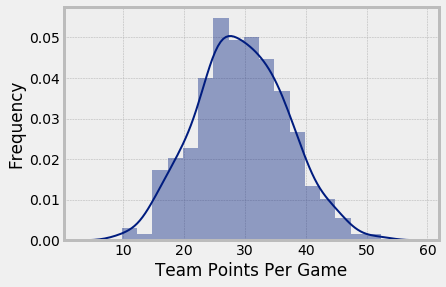

In [161]:
sns.distplot(train_data.teamScore)
plt.xlabel('Team Points Per Game')
plt.ylabel('Frequency')
plt.show()

In [162]:
(np.mean(train_y), np.mean(test_y))

(0.5191901845751323, 0.516396302110588)

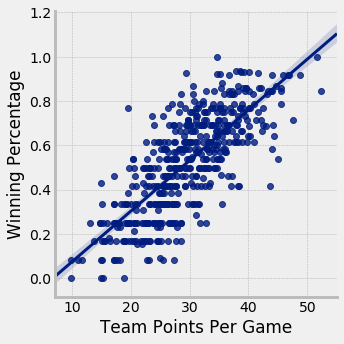

In [164]:
sns.lmplot(x='teamScore', y='result', data=train_data)
plt.xlabel('Team Points Per Game')
plt.ylabel('Winning Percentage')
plt.show()

In [173]:
train_data[(train_data.teamScore <= 20) & (train_data.result > 0.6)]

,index,teamID,team,teamScore,oppScore,result,TM_YD,TM_RA,TM_RY,TM_RV,...,OP_4A,OP_4C,OP_PEN,OP_TO,OP_FL,OP_INT,TM_3P,OP_3P,TM_4P,OP_4P
324,535,77,Northwestern,19.538462,18.615385,0.769231,327.076923,46.153846,188.538462,3.930769,...,1.846154,0.846154,41.538462,1.615385,0.692308,0.923077,0.406926,0.325472,0.454545,0.325472


In [174]:
train_data[(train_data.teamScore > 40) & (train_data.result < 0.5)]

,index,teamID,team,teamScore,oppScore,result,TM_YD,TM_RA,TM_RY,TM_RV,...,OP_4A,OP_4C,OP_PEN,OP_TO,OP_FL,OP_INT,TM_3P,OP_3P,TM_4P,OP_4P
481,799,2641,Texas Tech,43.666667,43.5,0.416667,566.583333,32.416667,103.583333,3.233333,...,1.75,0.916667,61.75,1.083333,0.666667,0.416667,0.515306,0.432927,0.44,0.432927


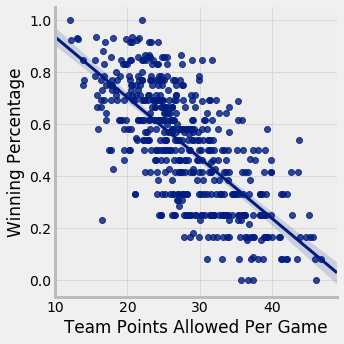

In [178]:
sns.lmplot(x='oppScore', y='result', data=train_data)
plt.xlabel('Team Points Allowed Per Game')
plt.ylabel('Winning Percentage')
plt.show()

In [179]:
train_data[(train_data.oppScore < 20) & (train_data.result < 0.4)]

,index,teamID,team,teamScore,oppScore,result,TM_YD,TM_RA,TM_RY,TM_RV,...,OP_4A,OP_4C,OP_PEN,OP_TO,OP_FL,OP_INT,TM_3P,OP_3P,TM_4P,OP_4P
268,439,103,Boston College,18.153846,16.461538,0.230769,283.769231,42.153846,173.692308,4.0,...,0.384615,0.076923,53.615385,1.923077,0.923077,1.0,0.271277,0.265625,0.4375,0.265625


In [181]:
train_data[(train_data.oppScore > 40) & (train_data.result > 0.4)]

,index,teamID,team,teamScore,oppScore,result,TM_YD,TM_RA,TM_RY,TM_RV,...,OP_4A,OP_4C,OP_PEN,OP_TO,OP_FL,OP_INT,TM_3P,OP_3P,TM_4P,OP_4P
353,583,2641,Texas Tech,45.076923,43.615385,0.538462,579.461538,35.692308,191.307692,5.323077,...,1.230769,0.538462,60.923077,1.923077,0.769231,1.153846,0.517241,0.494845,0.478261,0.494845
399,651,25,Cal,37.083333,42.583333,0.416667,513.166667,34.500000,154.333333,4.333333,...,0.916667,0.750000,76.750000,1.500000,0.583333,0.916667,0.386139,0.469136,0.741935,0.469136
481,799,2641,Texas Tech,43.666667,43.500000,0.416667,566.583333,32.416667,103.583333,3.233333,...,1.750000,0.916667,61.750000,1.083333,0.666667,0.416667,0.515306,0.432927,0.440000,0.432927


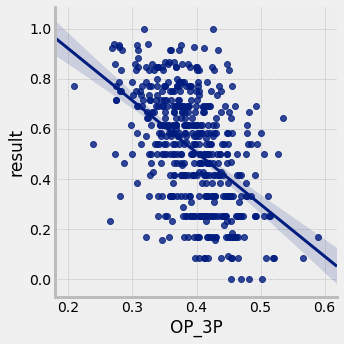

In [165]:
sns.lmplot(x='OP_3P',y='result', data=train_data)
plt.show()

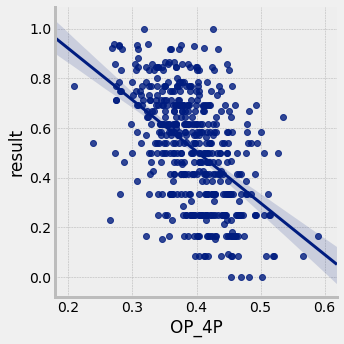

In [166]:
sns.lmplot(x='OP_4P',y='result', data=train_data)
plt.show()

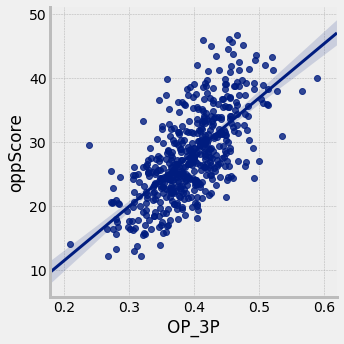

In [167]:
sns.lmplot(x='OP_3P', y='oppScore', data=train_data)
plt.show()

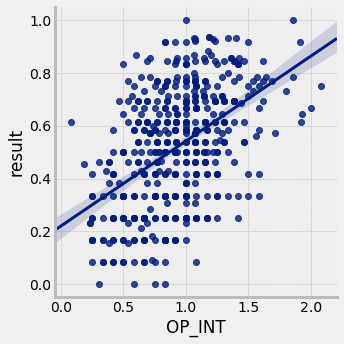

In [168]:
sns.lmplot(x='OP_INT',y='result', data=train_data)
plt.show()

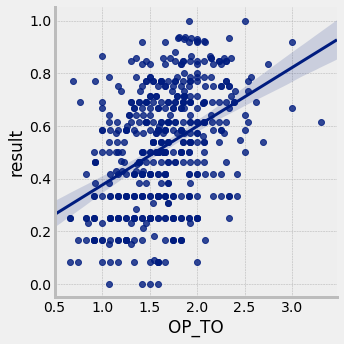

In [169]:
sns.lmplot(x='OP_TO',y='result', data=train_data)
plt.show()

In [171]:
winners = train_data[train_data.result >= 0.75]
losers = train_data[train_data.result <= 0.34]

In [184]:
winners.describe()

,index,teamID,teamScore,oppScore,result,TM_YD,TM_RA,TM_RY,TM_RV,TM_PC,...,OP_4A,OP_4C,OP_PEN,OP_TO,OP_FL,OP_INT,TM_3P,OP_3P,TM_4P,OP_4P
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,...,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,406.404255,647.606383,37.095940,21.659185,0.825394,463.341253,42.263479,213.552345,4.949594,19.035902,...,1.775884,0.816336,50.583185,1.873800,0.726101,1.147699,0.450565,0.355084,0.567393,0.355084
std,252.985797,926.542007,5.694788,4.255966,0.064684,54.181685,5.752483,51.677763,0.813346,4.962648,...,0.439394,0.302320,10.261332,0.389881,0.256133,0.315307,0.049833,0.049329,0.144921,0.049329
min,4.000000,2.000000,19.538462,12.142857,0.750000,327.076923,31.583333,128.642857,3.058333,4.785714,...,0.833333,0.266667,30.461538,0.692308,0.076923,0.500000,0.323699,0.209040,0.000000,0.209040
25%,218.250000,97.250000,33.711538,19.019231,0.769231,429.692308,38.471154,172.388736,4.382692,16.918269,...,1.471154,0.583333,43.479167,1.648810,0.574405,0.928571,0.420812,0.321608,0.480968,0.321608
50%,351.000000,201.000000,37.076923,22.000000,0.833333,460.000000,41.839744,204.379121,4.903333,19.118590,...,1.750000,0.833333,49.569048,1.895833,0.750000,1.080128,0.446514,0.358835,0.559028,0.358835
75%,612.000000,333.000000,40.153846,24.325549,0.857143,500.422619,45.229167,243.708333,5.344551,21.755952,...,2.057692,1.000000,56.399038,2.140476,0.921474,1.377747,0.483693,0.389809,0.642143,0.389809
max,839.000000,2711.000000,52.384615,31.615385,1.000000,618.769231,63.615385,381.083333,7.266667,35.384615,...,2.923077,1.533333,83.583333,3.000000,1.333333,2.083333,0.574324,0.456140,0.931034,0.456140


In [185]:
winners['score_diff'] = winners.teamScore - winners.oppScore

/Users/jamesdenney/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [186]:
winners.score_diff.describe()

count    94.000000
mean     15.436755
std       6.201109
min       0.923077
25%      11.442308
50%      14.005952
75%      18.778431
max      39.500000
Name: score_diff, dtype: float64

In [191]:
winners[['TM_3P','TM_4P']].describe()

,TM_3P,TM_4P
count,94.000000,94.000000
mean,0.450565,0.567393
std,0.049833,0.144921
min,0.323699,0.000000
25%,0.420812,0.480968
50%,0.446514,0.559028
75%,0.483693,0.642143
max,0.574324,0.931034


In [195]:
winners[(winners.TM_3P > 0.55)][['team','TM_3P','result']]

,team,TM_3P,result
45,LSU,0.571429,0.769231
47,Louisville,0.560000,0.923077
160,Georgia Tech,0.574324,0.833333


In [189]:
winners[(winners.score_diff < 1) | (winners.score_diff > 39)]

,index,teamID,team,teamScore,oppScore,result,TM_YD,TM_RA,TM_RY,TM_RV,...,OP_4C,OP_PEN,OP_TO,OP_FL,OP_INT,TM_3P,OP_3P,TM_4P,OP_4P,score_diff
27,48,52,FSU,51.642857,12.142857,1.000000,519.071429,36.071429,203.142857,5.807143,...,0.785714,45.928571,2.500000,0.642857,1.857143,0.522293,0.317757,0.750000,0.317757,39.500000
324,535,77,Northwestern,19.538462,18.615385,0.769231,327.076923,46.153846,188.538462,3.930769,...,0.846154,41.538462,1.615385,0.692308,0.923077,0.406926,0.325472,0.454545,0.325472,0.923077


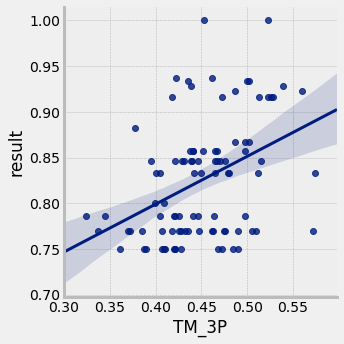

In [190]:
sns.lmplot(x='TM_3P',y='result',data=winners)
plt.show()

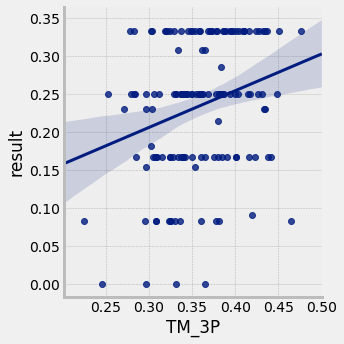

In [215]:
sns.lmplot(x='TM_3P',y='result',data=losers)
plt.show()

In [196]:
losers.describe()

,index,teamID,teamScore,oppScore,result,TM_YD,TM_RA,TM_RY,TM_RV,TM_PC,...,OP_4A,OP_4C,OP_PEN,OP_TO,OP_FL,OP_INT,TM_3P,OP_3P,TM_4P,OP_4P
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,428.027586,1087.993103,22.189517,33.877825,0.233844,361.686159,37.183727,149.550558,3.833234,18.411688,...,1.404529,0.779628,52.656771,1.429653,0.706725,0.722928,0.357938,0.426501,0.459675,0.426501
std,244.605946,1123.306036,4.952680,5.818722,0.087731,54.038721,5.692447,49.646551,0.859104,5.171153,...,0.370104,0.264203,10.031156,0.384245,0.237060,0.293136,0.047494,0.049636,0.120302,0.049636
min,2.000000,5.000000,9.750000,16.461538,0.000000,216.250000,20.250000,39.833333,1.158333,4.083333,...,0.384615,0.076923,26.666667,0.666667,0.250000,0.230769,0.225434,0.265625,0.176471,0.265625
25%,204.000000,127.000000,18.750000,29.416667,0.166667,326.500000,33.583333,117.333333,3.333333,15.538462,...,1.166667,0.583333,45.916667,1.166667,0.583333,0.500000,0.326203,0.395722,0.388889,0.395722
50%,431.000000,265.000000,22.583333,34.000000,0.250000,364.384615,36.833333,147.833333,3.850000,18.250000,...,1.416667,0.769231,52.666667,1.416667,0.666667,0.692308,0.357895,0.427136,0.464286,0.427136
75%,644.000000,2309.000000,25.250000,38.250000,0.333333,397.000000,40.250000,170.916667,4.341667,21.166667,...,1.583333,0.916667,58.769231,1.666667,0.833333,0.916667,0.387640,0.456140,0.535714,0.456140
max,823.000000,2751.000000,35.416667,46.750000,0.333333,517.500000,58.076923,317.230769,6.416667,42.500000,...,2.583333,1.583333,77.166667,2.416667,1.333333,1.583333,0.476471,0.588957,0.833333,0.588957


In [197]:
winners.TM_RV.mean() - losers.TM_RV.mean()

1.1163601199898463

In [198]:
winners.TM_RA.mean() - losers.TM_RA.mean()

5.079752828397417

In [200]:
winners.OP_3P.mean() - losers.OP_3P.mean()

-0.07141695215113592

In [212]:
winners.TM_3A.mean() - winners.OP_3A.mean()

-0.9998279671934167

In [211]:
losers.TM_3A.mean() - losers.OP_3A.mean()

0.7460786340096703

In [213]:
winners.TM_YD.mean() - winners.OP_YD.mean()

104.69188930072846

In [214]:
losers.TM_YD.mean() - losers.OP_YD.mean()

-77.81986059917114

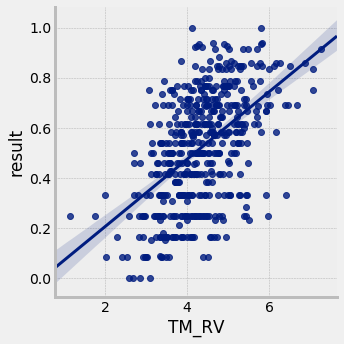

In [216]:
sns.lmplot(x="TM_RV", y='result', data=train_data)
plt.show()

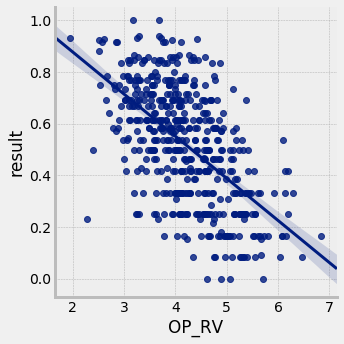

In [217]:
sns.lmplot(x="OP_RV", y='result', data=train_data)
plt.show()

In [218]:
train_data[(train_data.OP_RV < 3) & (train_data.result < 0.4)]

,index,teamID,team,teamScore,oppScore,result,TM_YD,TM_RA,TM_RY,TM_RV,...,OP_4A,OP_4C,OP_PEN,OP_TO,OP_FL,OP_INT,TM_3P,OP_3P,TM_4P,OP_4P
268,439,103,Boston College,18.153846,16.461538,0.230769,283.769231,42.153846,173.692308,4.0,...,0.384615,0.076923,53.615385,1.923077,0.923077,1.0,0.271277,0.265625,0.4375,0.265625


In [219]:
train_data[(train_data.TM_RV <= 2) & (train_data.result < 0.4)]

,index,teamID,team,teamScore,oppScore,result,TM_YD,TM_RA,TM_RY,TM_RV,...,OP_4A,OP_4C,OP_PEN,OP_TO,OP_FL,OP_INT,TM_3P,OP_3P,TM_4P,OP_4P
248,408,154,Wake Forest,14.833333,26.416667,0.25,216.25,31.916667,39.916667,1.158333,...,1.083333,0.500000,45.166667,1.583333,1.083333,0.50,0.282609,0.408377,0.40,0.408377
250,410,265,Washington St,31.833333,38.583333,0.25,517.50,20.250000,39.833333,1.750000,...,1.500000,0.833333,69.916667,0.666667,0.416667,0.25,0.414894,0.393064,0.45,0.393064


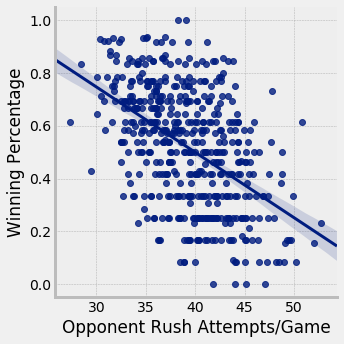

In [224]:
sns.lmplot(x="OP_RA", y='result', data=train_data)
plt.xlabel('Opponent Rush Attempts/Game')
plt.ylabel('Winning Percentage')
plt.show()

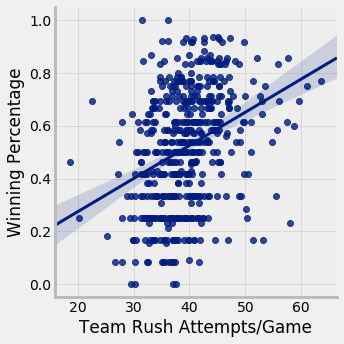

In [223]:
sns.lmplot(x="TM_RA", y='result', data=train_data)
plt.xlabel('Team Rush Attempts/Game')
plt.ylabel('Winning Percentage')
plt.show()

In [225]:
train_data[train_data.TM_RA < 25]

,index,teamID,team,teamScore,oppScore,result,TM_YD,TM_RA,TM_RY,TM_RV,...,OP_4A,OP_4C,OP_PEN,OP_TO,OP_FL,OP_INT,TM_3P,OP_3P,TM_4P,OP_4P
122,202,265,Washington St,31.000000,32.538462,0.461538,421.384615,18.692308,53.384615,2.707692,...,2.000000,1.153846,47.307692,2.307692,1.076923,1.230769,0.395000,0.381188,0.600000,0.381188
250,410,265,Washington St,31.833333,38.583333,0.250000,517.500000,20.250000,39.833333,1.750000,...,1.500000,0.833333,69.916667,0.666667,0.416667,0.250000,0.414894,0.393064,0.450000,0.393064
378,619,265,Washington St,31.461538,27.692308,0.692308,469.615385,22.615385,80.461538,3.530769,...,2.076923,0.846154,59.461538,1.846154,0.846154,1.000000,0.401042,0.445026,0.666667,0.445026


In [226]:
train_data['margin'] = train_data.teamScore - train_data.oppScore

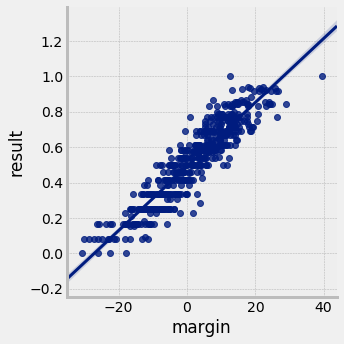

In [227]:
sns.lmplot(x='margin',y='result', data=train_data)
plt.show()

In [228]:
train_data['run_ratio'] = train_data.TM_RA / (train_data.TM_RA + train_data.TM_PA)

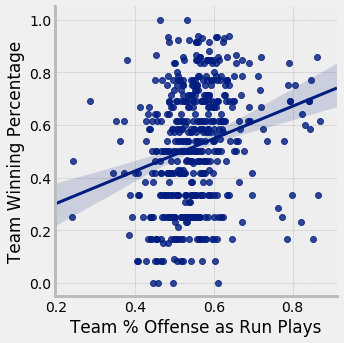

In [234]:
sns.lmplot(x='run_ratio',y='result', data=train_data)
plt.xlabel('Team % Offense as Run Plays')
plt.ylabel('Team Winning Percentage')
plt.show()

In [230]:
train_data['opp_run_ratio'] = train_data.OP_RA / (train_data.OP_RA + train_data.OP_PA)

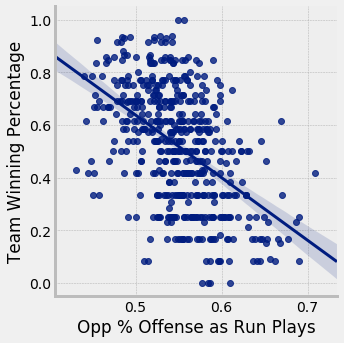

In [233]:
sns.lmplot(x='opp_run_ratio',y='result', data=train_data)
plt.xlabel('Opp % Offense as Run Plays')
plt.ylabel('Team Winning Percentage')
plt.show()

In [235]:
winners['run_ratio'] = winners.TM_RA / (winners.OP_RA + winners.TM_RA)
winners['opp_run_ratio'] = winners.OP_RA / (winners.OP_RA + winners.TM_RA)

/Users/jamesdenney/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jamesdenney/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [238]:
losers['run_ratio'] = losers.TM_RA / (losers.OP_RA + losers.TM_RA)
losers['opp_run_ratio'] = losers.OP_RA / (losers.OP_RA + losers.TM_RA)

/Users/jamesdenney/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jamesdenney/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


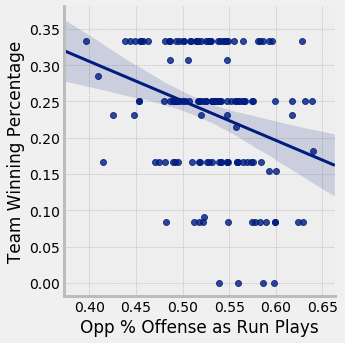

In [239]:
sns.lmplot(x='opp_run_ratio',y='result', data=losers)
plt.xlabel('Opp % Offense as Run Plays')
plt.ylabel('Team Winning Percentage')
plt.show()

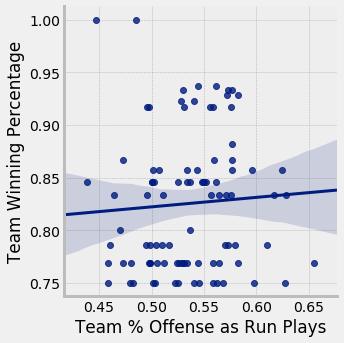

In [240]:
sns.lmplot(x='run_ratio',y='result', data=winners)
plt.xlabel('Team % Offense as Run Plays')
plt.ylabel('Team Winning Percentage')
plt.show()

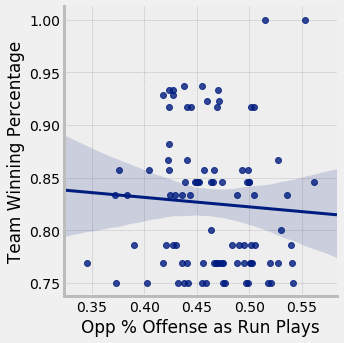

In [236]:
sns.lmplot(x='opp_run_ratio',y='result', data=winners)
plt.xlabel('Opp % Offense as Run Plays')
plt.ylabel('Team Winning Percentage')
plt.show()

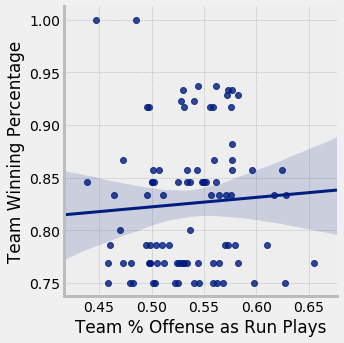

In [237]:
sns.lmplot(x='run_ratio',y='result', data=winners)
plt.xlabel('Team % Offense as Run Plays')
plt.ylabel('Team Winning Percentage')
plt.show()

In [244]:
losers.run_ratio.describe()

count    145.000000
mean       0.468771
std        0.048176
min        0.360208
25%        0.440273
50%        0.468317
75%        0.500000
max        0.603996
Name: run_ratio, dtype: float64

# Principal Component Analysis

In [245]:
train_data.head()

,index,teamID,team,teamScore,oppScore,result,TM_YD,TM_RA,TM_RY,TM_RV,...,OP_TO,OP_FL,OP_INT,TM_3P,OP_3P,TM_4P,OP_4P,margin,run_ratio,opp_run_ratio
0,2,2005,Air Force,24.666667,40.000000,0.166667,367.583333,53.083333,262.666667,4.941667,...,0.750000,0.416667,0.333333,0.441860,0.588957,0.592593,0.588957,-15.333333,0.785450,0.644880
1,3,2006,Akron,20.166667,28.583333,0.416667,342.000000,34.833333,122.583333,3.525000,...,1.583333,0.500000,1.083333,0.393443,0.428571,0.388889,0.428571,-8.416667,0.499403,0.554913
2,4,333,Alabama,38.153846,13.923077,0.846154,454.076923,35.461538,205.615385,5.707692,...,1.461538,0.615385,0.846154,0.476190,0.346591,0.583333,0.346591,24.230769,0.558111,0.539559
3,10,12,Arizona,33.461538,24.230769,0.615385,458.461538,49.769231,264.923077,5.400000,...,1.692308,0.307692,1.384615,0.471698,0.393365,0.400000,0.393365,9.230769,0.628155,0.535822
4,11,9,Arizona State,39.714286,26.642857,0.714286,457.285714,43.428571,191.357143,4.271429,...,2.357143,0.857143,1.500000,0.390698,0.370892,0.600000,0.370892,13.071429,0.551724,0.527601


In [246]:
pca_data = train_data.copy()

In [247]:
pca_data.drop(['index','teamID','team'],axis=1,inplace=True)

In [259]:
pca_data.head(2)

,TM_YD,TM_RA,TM_RY,TM_RV,TM_PC,TM_PA,TM_PY,TM_PAV,TM_FD,TM_3A,...,OP_TO,OP_FL,OP_INT,TM_3P,OP_3P,TM_4P,OP_4P,margin,run_ratio,opp_run_ratio
0,367.583333,53.083333,262.666667,4.941667,7.75,14.500000,104.916667,7.608333,19.166667,14.333333,...,0.750000,0.416667,0.333333,0.441860,0.588957,0.592593,0.588957,-15.333333,0.785450,0.644880
1,342.000000,34.833333,122.583333,3.525000,19.50,34.916667,219.416667,6.300000,18.916667,15.250000,...,1.583333,0.500000,1.083333,0.393443,0.428571,0.388889,0.428571,-8.416667,0.499403,0.554913


In [251]:
pca_data.drop(['result'],axis=1,inplace=True)

In [258]:
# Omit score data, too, since each category is a bit "duh"
pca_data.drop(['teamScore','oppScore'],axis=1,inplace=True)

In [272]:
pca_data.drop(['margin'],axis=1,inplace=True)

In [273]:
pca_data = (pca_data - pca_data.mean()) / pca_data.std()

In [249]:
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [274]:
# To do PCA, create from sklearn a PCA class with a number of features equal to the number of columns
stats_pca = PCA(n_components=40)

In [275]:
# Fit the stats data!
stats_pca.fit(pca_data.values)

PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [276]:
# Show the loadings for each component.
stats_comp = stats_pca.components_
stats_comp

array([[  9.29864026e-02,   1.98608640e-01,   2.06490534e-01, ...,
         -2.32954883e-01,   2.03000212e-01,  -1.77520158e-01],
       [  2.91324948e-01,  -6.60775645e-02,  -2.02640117e-02, ...,
         -5.65794753e-02,  -1.96031187e-01,  -2.04695516e-01],
       [  1.70122838e-01,   2.39324847e-01,   2.96104631e-01, ...,
          2.32287856e-01,   2.31473140e-01,   1.50560143e-02],
       ..., 
       [ -2.18731473e-13,   1.55034749e-15,   1.77128124e-13, ...,
         -1.10681246e-01,   4.77183805e-17,   4.20979195e-16],
       [  0.00000000e+00,  -1.24882619e-16,   9.41438211e-16, ...,
         -5.40303419e-01,  -2.33191950e-17,  -4.65323451e-16],
       [ -0.00000000e+00,  -2.66172828e-16,  -5.61748852e-16, ...,
         -4.42517658e-01,   2.14389002e-16,   1.61298747e-16]])

In [263]:
stat_cols = pca_data.columns

In [277]:
pcs = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15',
      'PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30',
      'PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40']

In [278]:
# return the loadings for each PCA, with column names corresponding to each loading

print(stat_cols)
print('-------------------------------------')

for ii, pc in enumerate(pcs):
    print(pc, 'weighting vector:', stats_comp[ii])
    print('-------------------------------------')

Index(['TM_YD', 'TM_RA', 'TM_RY', 'TM_RV', 'TM_PC', 'TM_PA', 'TM_PY', 'TM_PAV',
       'TM_FD', 'TM_3A', 'TM_3C', 'TM_4A', 'TM_4C', 'TM_PEN', 'TM_TO', 'TM_FL',
       'TM_INT', 'OP_YD', 'OP_RA', 'OP_RY', 'OP_RV', 'OP_PC', 'OP_PA', 'OP_PY',
       'OP_PAV', 'OP_FD', 'OP_3A', 'OP_3C', 'OP_4A', 'OP_4C', 'OP_PEN',
       'OP_TO', 'OP_FL', 'OP_INT', 'TM_3P', 'OP_3P', 'TM_4P', 'OP_4P',
       'margin', 'run_ratio', 'opp_run_ratio'],
      dtype='object')
-------------------------------------
PC1 weighting vector: [ 0.0929864   0.19860864  0.20649053  0.17211547 -0.134685   -0.18270411
 -0.08102395  0.15056029  0.06464458 -0.1010553   0.07506886 -0.13305448
 -0.05595592 -0.02652344 -0.16129669 -0.035312   -0.17493053 -0.27401065
 -0.24755725 -0.27102188 -0.2371266  -0.05262694  0.04619656 -0.11682585
 -0.19457641 -0.25873709  0.00069079 -0.21318024  0.04335374 -0.03798189
 -0.10229356  0.11824375 -0.0189986   0.15957664  0.14848934 -0.23295488
  0.08781134 -0.23295488  0.20300021 -0.17752016]

In [279]:
# return the eigenvalues and the explained variance
# sklearn's explained_variance_ returns the eigenvalues, but explained_variance_ratio_ gives the actual explained variance

stat_exp_var_eigenvals = stats_pca.explained_variance_
stat_exp_var_pct = stats_pca.explained_variance_ratio_

print('eigenvalues:', stat_exp_var_eigenvals)
print('')
print('explained variance pct:', stat_exp_var_pct)
print('')
print(stat_exp_var_pct.sum())

eigenvalues: [  8.68250979e+00   6.38744191e+00   5.13063703e+00   3.07586467e+00
   2.40166595e+00   2.02212502e+00   1.62955499e+00   1.46297026e+00
   1.37273990e+00   1.18736828e+00   1.14585986e+00   9.00273941e-01
   8.07120945e-01   6.96546461e-01   6.28389423e-01   5.64502775e-01
   5.19448826e-01   4.71408445e-01   2.39923731e-01   2.00201851e-01
   1.48220214e-01   9.68111815e-02   6.07810340e-02   3.67421557e-02
   3.23037072e-02   2.50947009e-02   2.03821715e-02   1.46564504e-02
   1.33402166e-02   9.11174763e-03   5.23417209e-03   3.45261242e-03
   2.76394967e-03   2.61490759e-03   1.93577628e-03   6.22790622e-07
   3.15456331e-07   1.71232313e-30   4.38164498e-32   4.38164498e-32]

explained variance pct: [  2.17062745e-01   1.59686048e-01   1.28265926e-01   7.68966168e-02
   6.00416487e-02   5.05531256e-02   4.07388748e-02   3.65742566e-02
   3.43184975e-02   2.96842070e-02   2.86464965e-02   2.25068485e-02
   2.01780236e-02   1.74136615e-02   1.57097356e-02   1.41125694